## Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 88%

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision as tv
import time
%matplotlib inline

In [30]:
!ls

 1			  lect2		      smsspamcollection.zip
 b_s.png		  lesson1_try.ipynb   Untitled1.ipynb
 data.csv		  MLP.ipynb	      Untitled2.ipynb
'download (3)'		  MNIST		      Untitled.ipynb
 fashion		  naive_bayes.ipynb  'Лекция 1.ipynb'
 gru			  readme	     'Лекция 2 (1).ipynb'
 HW_2_BOSTON_LINEAR_REG   SMSSpamCollection  'Лекция 6.ipynb'


In [2]:
train_dataset = tv.datasets.FashionMNIST('./fashion', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('./fashion', train=False, transform=tv.transforms.ToTensor(), download=True)


In [3]:
BATCH_SIZE = 512
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
train_dataset.targets.unique().shape

torch.Size([10])

In [5]:

def train_model(model, num_epochs, train, test, trainer, dev):
    model.to(dev)
    loss = torch.nn.CrossEntropyLoss(reduction='sum')
    train_losses,test_losses, train_accuracy, test_accuracy=[],[],[],[]
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        model.train()
        for X, y in train:
            X, y = X.to(dev), y.to(dev)
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)

        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            X, y = X.to(dev), y.to(dev)
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)

        print("ep: {},taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
            ep,time.time()-start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )
        train_losses.append(train_loss / train_iters)
        test_losses.append(test_loss / test_iters)
        train_accuracy.append(train_acc / train_passed)
        test_accuracy.append(test_acc / test_passed)
        
    return train_losses,test_losses, train_accuracy, test_accuracy

In [6]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

### Возьмем простешую полносвязную сеть из лекции 

In [7]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [8]:
num_epochs=30
loss = torch.nn.CrossEntropyLoss(reduction='sum')
trainer = torch.optim.SGD(model.parameters(), lr=0.001)
history=train_model(model, num_epochs, train, test, trainer, dev)

ep: 0,taked: 5.123, train_loss: 452.68113973585224, train_acc: 0.6705, test_loss: 318.4785675048828, test_acc: 0.7522
ep: 1,taked: 5.084, train_loss: 279.1077433440645, train_acc: 0.7967166666666666, test_loss: 246.73880615234376, test_acc: 0.8217
ep: 2,taked: 5.116, train_loss: 242.53215810808084, train_acc: 0.8245666666666667, test_loss: 220.94643020629883, test_acc: 0.8396
ep: 3,taked: 5.023, train_loss: 218.70722360126044, train_acc: 0.8418, test_loss: 220.72138328552245, test_acc: 0.834
ep: 4,taked: 5.076, train_loss: 204.38689729722878, train_acc: 0.8520166666666666, test_loss: 222.10651168823242, test_acc: 0.8413
ep: 5,taked: 5.043, train_loss: 197.86488109523967, train_acc: 0.8568333333333333, test_loss: 196.0139301300049, test_acc: 0.8583
ep: 6,taked: 5.166, train_loss: 188.4599522089554, train_acc: 0.8634166666666667, test_loss: 200.05708198547364, test_acc: 0.8474
ep: 7,taked: 5.210, train_loss: 180.16916598303843, train_acc: 0.8698833333333333, test_loss: 201.18807220458984

In [9]:
loss,val_loss,acc,val_acc=history

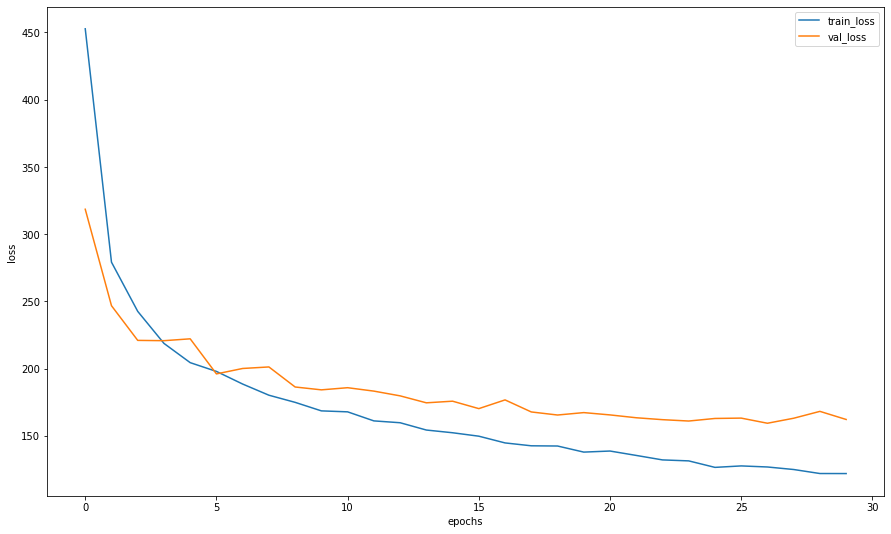

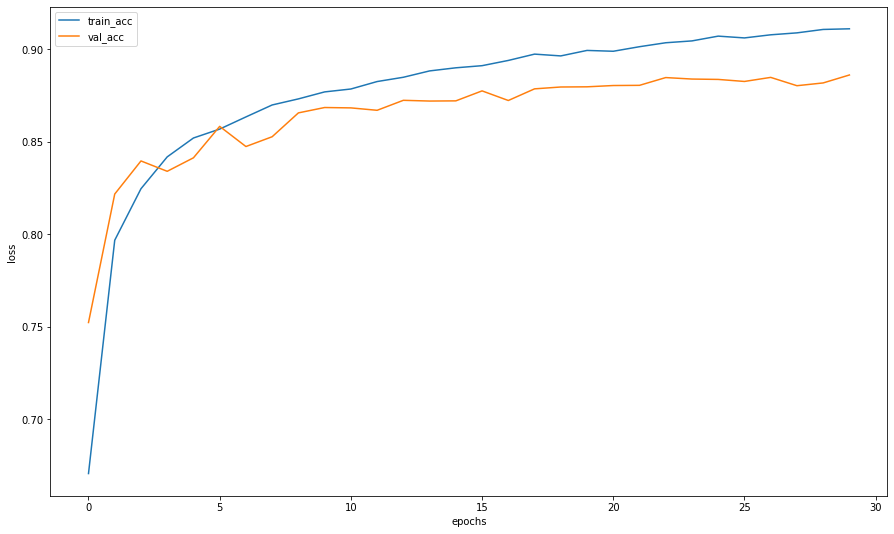

In [10]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")

plt.figure(figsize=(15, 9))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [21]:
# Уменьшим LR :
num_epochs=30
loss = torch.nn.CrossEntropyLoss(reduction='sum')
trainer = torch.optim.SGD(model.parameters(), lr=0.0001)
history=train_model(model, num_epochs, train, test, trainer, dev)

ep: 0,taked: 5.237, train_loss: 104.97720336914062, train_acc: 0.9249666666666667, test_loss: 153.6077018737793, test_acc: 0.8905
ep: 1,taked: 5.267, train_loss: 103.50318208791442, train_acc: 0.9264, test_loss: 152.9999237060547, test_acc: 0.8905
ep: 2,taked: 5.122, train_loss: 102.96419507366116, train_acc: 0.9268666666666666, test_loss: 152.79027709960937, test_acc: 0.8914
ep: 3,taked: 5.135, train_loss: 102.6470392114025, train_acc: 0.9270166666666667, test_loss: 153.01209869384766, test_acc: 0.8915
ep: 4,taked: 5.115, train_loss: 102.34241598743503, train_acc: 0.927, test_loss: 152.6385009765625, test_acc: 0.8912
ep: 5,taked: 5.115, train_loss: 101.95325974286612, train_acc: 0.9277666666666666, test_loss: 152.43698539733887, test_acc: 0.8918
ep: 6,taked: 5.115, train_loss: 101.6601484912937, train_acc: 0.9283, test_loss: 152.64660263061523, test_acc: 0.8924
ep: 7,taked: 5.106, train_loss: 101.38414616503958, train_acc: 0.92805, test_loss: 152.50415840148926, test_acc: 0.8915
ep: 8

In [ ]:
* где- то в .89 застряли

### Попробуем добавить BatchNorm и Dropout

In [11]:
model2 = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.BatchNorm1d(784),
    
    
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(256, 10)
    
)


In [14]:
num_epochs=30
trainer = torch.optim.SGD(model2.parameters(), lr=0.001)
history2=train_model(model2, num_epochs, train, test, trainer, dev)

ep: 0,taked: 5.157, train_loss: 400.86261532670363, train_acc: 0.7545666666666667, test_loss: 224.98741035461427, test_acc: 0.8369
ep: 1,taked: 5.128, train_loss: 210.23229324211508, train_acc: 0.8488333333333333, test_loss: 199.90476455688477, test_acc: 0.8566
ep: 2,taked: 5.059, train_loss: 189.42351596638306, train_acc: 0.8636666666666667, test_loss: 185.87877960205077, test_acc: 0.8637
ep: 3,taked: 5.116, train_loss: 173.1108903723248, train_acc: 0.8751333333333333, test_loss: 181.37615242004395, test_acc: 0.8698
ep: 4,taked: 5.113, train_loss: 164.1331741850255, train_acc: 0.8809166666666667, test_loss: 176.00701675415038, test_acc: 0.8727
ep: 5,taked: 5.164, train_loss: 156.02754366599908, train_acc: 0.8869, test_loss: 174.9919506072998, test_acc: 0.8754
ep: 6,taked: 5.132, train_loss: 149.32310084973352, train_acc: 0.8916333333333334, test_loss: 166.6353504180908, test_acc: 0.8787
ep: 7,taked: 5.061, train_loss: 141.8121913974568, train_acc: 0.8975333333333333, test_loss: 171.96

In [15]:
# Уменьшим LR :
num_epochs=30
trainer = torch.optim.SGD(model2.parameters(), lr=0.0001)
history3=train_model(model2, num_epochs, train, test, trainer, dev)

ep: 0,taked: 5.205, train_loss: 65.28524188672083, train_acc: 0.9551666666666667, test_loss: 162.21652851104736, test_acc: 0.9001
ep: 1,taked: 5.166, train_loss: 60.40559647446972, train_acc: 0.9583, test_loss: 162.65482444763182, test_acc: 0.8991
ep: 2,taked: 5.231, train_loss: 59.38693142745454, train_acc: 0.95975, test_loss: 163.37587814331056, test_acc: 0.9003
ep: 3,taked: 5.190, train_loss: 58.232165979126755, train_acc: 0.9606333333333333, test_loss: 163.9837490081787, test_acc: 0.9007
ep: 4,taked: 5.216, train_loss: 58.15959956282276, train_acc: 0.9594333333333334, test_loss: 163.09205780029296, test_acc: 0.9001
ep: 5,taked: 5.187, train_loss: 57.29574612439689, train_acc: 0.96085, test_loss: 161.39682121276854, test_acc: 0.901
ep: 6,taked: 5.172, train_loss: 56.84278022636801, train_acc: 0.9618833333333333, test_loss: 162.65731086730958, test_acc: 0.9018
ep: 7,taked: 5.182, train_loss: 56.4707734221119, train_acc: 0.961, test_loss: 162.1040096282959, test_acc: 0.9022
ep: 8,take

*  ок, добрались до 0.9 на тесте, 

### пробуем еще усложнить архитектуру

In [18]:
model3 = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.BatchNorm1d(784),
    
    torch.nn.Linear(784, 4096),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(4096),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(4096, 2048),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(2048),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(2048, 1024),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(1024),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(1024, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(512, 10)
    
)


In [19]:
num_epochs=30
trainer = torch.optim.SGD(model3.parameters(), lr=0.001)
history2=train_model(model3,num_epochs, train, test, trainer, dev)

ep: 0,taked: 6.388, train_loss: 437.427648285688, train_acc: 0.7635333333333333, test_loss: 204.11029624938965, test_acc: 0.8534
ep: 1,taked: 6.421, train_loss: 195.42986944166282, train_acc: 0.8605333333333334, test_loss: 206.27305603027344, test_acc: 0.8606
ep: 2,taked: 6.382, train_loss: 170.80667288828704, train_acc: 0.8766666666666667, test_loss: 180.65098495483397, test_acc: 0.8666
ep: 3,taked: 6.386, train_loss: 156.40088653564453, train_acc: 0.88475, test_loss: 170.02296829223633, test_acc: 0.8754
ep: 4,taked: 6.342, train_loss: 142.4703339722197, train_acc: 0.8963, test_loss: 168.11428871154786, test_acc: 0.883
ep: 5,taked: 6.691, train_loss: 134.65262713674772, train_acc: 0.9006833333333333, test_loss: 184.23102188110352, test_acc: 0.8641
ep: 6,taked: 6.387, train_loss: 129.35788962800623, train_acc: 0.9039833333333334, test_loss: 162.3232093811035, test_acc: 0.8852
ep: 7,taked: 6.379, train_loss: 119.87529329526222, train_acc: 0.9103666666666667, test_loss: 171.9251136779785

In [20]:
num_epochs=30
trainer = torch.optim.SGD(model3.parameters(), lr=0.0001)
history2=train_model(model3,num_epochs, train, test, trainer, dev)

ep: 0,taked: 6.373, train_loss: 26.891101926060045, train_acc: 0.98115, test_loss: 194.8467716217041, test_acc: 0.9069
ep: 1,taked: 6.419, train_loss: 22.981239840135736, train_acc: 0.98335, test_loss: 200.5569278717041, test_acc: 0.9078
ep: 2,taked: 6.359, train_loss: 20.82795004521386, train_acc: 0.98505, test_loss: 206.92048568725585, test_acc: 0.907
ep: 3,taked: 6.354, train_loss: 19.51756162562613, train_acc: 0.9859333333333333, test_loss: 212.5047706604004, test_acc: 0.9061
ep: 4,taked: 6.401, train_loss: 18.40924565670854, train_acc: 0.9864333333333334, test_loss: 215.36923599243164, test_acc: 0.9068
ep: 5,taked: 6.358, train_loss: 17.83961112620467, train_acc: 0.9870333333333333, test_loss: 220.28927345275878, test_acc: 0.9065
ep: 6,taked: 6.401, train_loss: 16.86082550630731, train_acc: 0.9877333333333334, test_loss: 221.506538772583, test_acc: 0.9075
ep: 7,taked: 6.397, train_loss: 16.115044933254435, train_acc: 0.988, test_loss: 223.1236545562744, test_acc: 0.9076
ep: 8,take

* Пришли в какой-то минимум .906-.907 это почти сторлько же, сколько нам давала архиртетура с одним скрытым слоем
* Заметим что в отличии от преддыдущих архитерктур , более сложная прктически полностью выучивает трейн


### Поробуем другой оптимизатор

In [23]:
model3 = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.BatchNorm1d(784),
    
    torch.nn.Linear(784, 4096),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(4096),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(4096, 2048),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(2048),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(2048, 1024),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(1024),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(1024, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Dropout(0.3),
    
    torch.nn.Linear(512, 10)
    
)


In [24]:
num_epochs=30
trainer = torch.optim.Adam(model3.parameters(), lr=0.001)
history3=train_model(model3,num_epochs, train, test, trainer, dev)

ep: 0,taked: 6.711, train_loss: 239.94797671043267, train_acc: 0.82865, test_loss: 200.82889213562012, test_acc: 0.8553
ep: 1,taked: 6.687, train_loss: 177.0203085268958, train_acc: 0.8718, test_loss: 198.33208770751952, test_acc: 0.857
ep: 2,taked: 6.683, train_loss: 158.94787500672422, train_acc: 0.8843666666666666, test_loss: 177.47551651000975, test_acc: 0.8703
ep: 3,taked: 6.701, train_loss: 145.61867549055714, train_acc: 0.8930666666666667, test_loss: 169.9511013031006, test_acc: 0.8791
ep: 4,taked: 6.771, train_loss: 139.20163106110135, train_acc: 0.8985833333333333, test_loss: 162.13217887878417, test_acc: 0.8838
ep: 5,taked: 6.797, train_loss: 129.50895099316614, train_acc: 0.9039666666666667, test_loss: 161.06216278076172, test_acc: 0.8825
ep: 6,taked: 6.730, train_loss: 121.95034301887124, train_acc: 0.9101833333333333, test_loss: 181.23487434387206, test_acc: 0.8709
ep: 7,taked: 6.587, train_loss: 115.84638078333968, train_acc: 0.9144333333333333, test_loss: 159.68028450012

In [25]:

num_epochs=30
trainer = torch.optim.Adam(model3.parameters(), lr=0.0001)
history3=train_model(model3,num_epochs, train, test, trainer, dev)

ep: 0,taked: 6.828, train_loss: 38.91216147148003, train_acc: 0.97165, test_loss: 181.4316379547119, test_acc: 0.9063
ep: 1,taked: 6.761, train_loss: 30.71102760605893, train_acc: 0.9776666666666667, test_loss: 189.24124641418456, test_acc: 0.907
ep: 2,taked: 6.740, train_loss: 26.938414024094403, train_acc: 0.98075, test_loss: 194.99345703125, test_acc: 0.9083
ep: 3,taked: 6.705, train_loss: 24.811189425193657, train_acc: 0.9820333333333333, test_loss: 198.12643966674804, test_acc: 0.9078
ep: 4,taked: 6.768, train_loss: 22.467975879119614, train_acc: 0.98395, test_loss: 207.77224044799806, test_acc: 0.909
ep: 5,taked: 6.707, train_loss: 20.77860046241243, train_acc: 0.9850166666666667, test_loss: 211.44349212646483, test_acc: 0.9066
ep: 6,taked: 6.786, train_loss: 20.487034328913285, train_acc: 0.9849, test_loss: 216.5099021911621, test_acc: 0.9087
ep: 7,taked: 6.782, train_loss: 18.795891256655676, train_acc: 0.9863666666666666, test_loss: 218.7876895904541, test_acc: 0.9085
ep: 8,ta

* Адам чуть-чуть лучшую току нащупал 0.909, пробуем еще умень 